## Import Necessary Libraries

In [49]:
## Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("preprocessed_car_accident_dataset.csv")
df.head()

,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Age,Vehicle_Type,Passenger_Present,Hour_of_Registration
0,1,0,0,0,0.232877,0,0,2
1,2,1,1,1,0.328767,1,0,2
2,3,1,0,1,0.191781,1,1,2
3,1,0,1,1,0.739726,2,1,5
4,2,1,0,1,0.506849,2,0,5


## Split the data into features (X) and target (y)

In [13]:
X = df.drop('Severity_Code', axis=1)
y = df['Severity_Code']

## Split the data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Setting K-Fold Cross Validation's
It is a technique used to assess the performance and reliability of a machine learning model. It is useful when having a limited amount of data and want to make the most out of it as well as avoiding issues like overfitting or underfitting at the same time.



In [15]:
# K-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2', None],
}

rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=kf, verbose=10)
rf_grid_search.fit(X_train, y_train)

# Access best model and params
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START max_depth=None, max_features=sqrt, n_estimators=100........
[CV 1/5; 1/27] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.846 total time=   0.7s
[CV 2/5; 1/27] START max_depth=None, max_features=sqrt, n_estimators=100........
[CV 2/5; 1/27] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.855 total time=   0.6s
[CV 3/5; 1/27] START max_depth=None, max_features=sqrt, n_estimators=100........
[CV 3/5; 1/27] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.854 total time=   0.6s
[CV 4/5; 1/27] START max_depth=None, max_features=sqrt, n_estimators=100........
[CV 4/5; 1/27] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.849 total time=   0.6s
[CV 5/5; 1/27] START max_depth=None, max_features=sqrt, n_estimators=100........
[CV 5/5; 1/27] END max_depth=None, max_features=sqrt, n_estimators=100;, score=0.849 total time=   0.6s
[CV 1/5; 2/27

[CV 5/5; 9/27] END max_depth=None, max_features=None, n_estimators=300;, score=0.845 total time=   3.6s
[CV 1/5; 10/27] START max_depth=10, max_features=sqrt, n_estimators=100.........
[CV 1/5; 10/27] END max_depth=10, max_features=sqrt, n_estimators=100;, score=0.873 total time=   0.4s
[CV 2/5; 10/27] START max_depth=10, max_features=sqrt, n_estimators=100.........
[CV 2/5; 10/27] END max_depth=10, max_features=sqrt, n_estimators=100;, score=0.891 total time=   0.3s
[CV 3/5; 10/27] START max_depth=10, max_features=sqrt, n_estimators=100.........
[CV 3/5; 10/27] END max_depth=10, max_features=sqrt, n_estimators=100;, score=0.882 total time=   0.3s
[CV 4/5; 10/27] START max_depth=10, max_features=sqrt, n_estimators=100.........
[CV 4/5; 10/27] END max_depth=10, max_features=sqrt, n_estimators=100;, score=0.878 total time=   0.4s
[CV 5/5; 10/27] START max_depth=10, max_features=sqrt, n_estimators=100.........
[CV 5/5; 10/27] END max_depth=10, max_features=sqrt, n_estimators=100;, score=0

[CV 5/5; 18/27] END max_depth=10, max_features=None, n_estimators=300;, score=0.874 total time=   2.9s
[CV 1/5; 19/27] START max_depth=20, max_features=sqrt, n_estimators=100.........
[CV 1/5; 19/27] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.854 total time=   0.7s
[CV 2/5; 19/27] START max_depth=20, max_features=sqrt, n_estimators=100.........
[CV 2/5; 19/27] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.865 total time=   0.7s
[CV 3/5; 19/27] START max_depth=20, max_features=sqrt, n_estimators=100.........
[CV 3/5; 19/27] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.860 total time=   0.7s
[CV 4/5; 19/27] START max_depth=20, max_features=sqrt, n_estimators=100.........
[CV 4/5; 19/27] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.855 total time=   0.7s
[CV 5/5; 19/27] START max_depth=20, max_features=sqrt, n_estimators=100.........
[CV 5/5; 19/27] END max_depth=20, max_features=sqrt, n_estimators=100;, score=0.

[CV 5/5; 27/27] END max_depth=20, max_features=None, n_estimators=300;, score=0.851 total time=   3.7s


In [18]:
print(best_rf_params)

rf_y_pred = best_rf_model.predict(X_test)
print("\nClassfication Report for Random Forest Model:")
print(classification_report(y_test, rf_y_pred))

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

Classfication Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1999
           1       0.87      0.90      0.89      1784

    accuracy                           0.89      3783
   macro avg       0.89      0.89      0.89      3783
weighted avg       0.89      0.89      0.89      3783



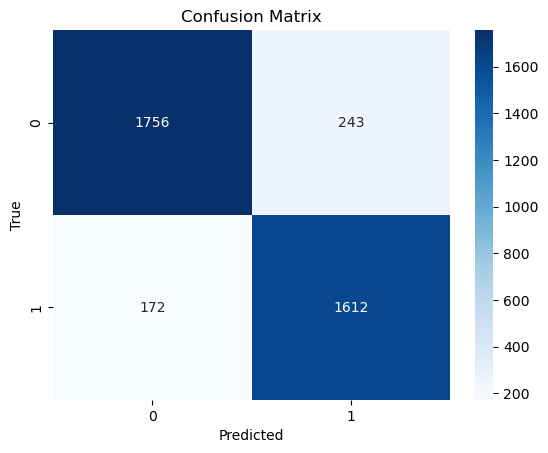

In [19]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# Define a grid of hyperparameters to search
# Grid search is used to find the best combination of hyperparameters for a machine learning model. 
# Hyperparameters are settings or configurations for the model that are not learned from the data but need to be specified before training.
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values for k
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  # Additional hyperparameters specific to k-NN
}

# Create KNN classifier
knn = KNeighborsClassifier()

# Perform grid search
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=kf, verbose=10)
knn_grid_search.fit(X_train, y_train)

# Access best model and params
best_knn_model = knn_grid_search.best_estimator_
best_knn_params = knn_grid_search.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 1/5; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.839 total time=   0.0s
[CV 2/5; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 2/5; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.856 total time=   0.0s
[CV 3/5; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 3/5; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.846 total time=   0.0s
[CV 4/5; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 4/5; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.848 total time=   0.0s
[CV 5/5; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 5/5; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.839 total time=   0.0s
[CV 1/5; 2/16] START metric=e

[CV 4/5; 10/16] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.825 total time=   0.0s
[CV 5/5; 10/16] START metric=manhattan, n_neighbors=3, weights=distance.........
[CV 5/5; 10/16] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.818 total time=   0.0s
[CV 1/5; 11/16] START metric=manhattan, n_neighbors=5, weights=uniform..........
[CV 1/5; 11/16] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.856 total time=   0.0s
[CV 2/5; 11/16] START metric=manhattan, n_neighbors=5, weights=uniform..........
[CV 2/5; 11/16] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.868 total time=   0.0s
[CV 3/5; 11/16] START metric=manhattan, n_neighbors=5, weights=uniform..........
[CV 3/5; 11/16] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.859 total time=   0.0s
[CV 4/5; 11/16] START metric=manhattan, n_neighbors=5, weights=uniform..........
[CV 4/5; 11/16] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.859 

In [22]:
print(best_knn_params)

knn_y_pred = best_knn_model.predict(X_test)
print("\nClassfication Report for KNN Model:")
print(classification_report(y_test, knn_y_pred))

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Classfication Report for KNN Model:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1999
           1       0.86      0.89      0.87      1784

    accuracy                           0.88      3783
   macro avg       0.88      0.88      0.88      3783
weighted avg       0.88      0.88      0.88      3783



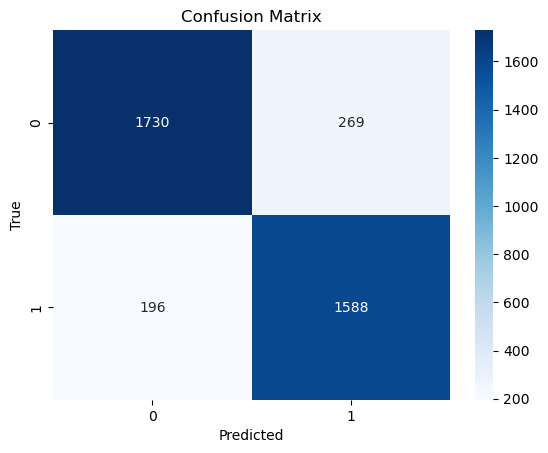

In [23]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression

In [41]:
# Define hyperparameters
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000], 
}

# Creating a Gaussian Naive Bayes model
lr_model = LogisticRegression(random_state=42)

# Grid search
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=kf, verbose=10)
lr_grid_search.fit(X_train, y_train)

# Access best model and params
best_lr_model = lr_grid_search.best_estimator_
best_lr_params = lr_grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START C=0.001, max_iter=100, penalty=l1..........................
[CV 1/5; 1/24] END C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 1/24] START C=0.001, max_iter=100, penalty=l1..........................
[CV 2/5; 1/24] END C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 1/24] START C=0.001, max_iter=100, penalty=l1..........................
[CV 3/5; 1/24] END C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 1/24] START C=0.001, max_iter=100, penalty=l1..........................
[CV 4/5; 1/24] END C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 1/24] START C=0.001, max_iter=100, penalty=l1..........................
[CV 5/5; 1/24] END C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 2/24] START C=0.001, max_iter=100, penalty=l2..........................
[CV 1/5; 2/24] END C=0.001, max_

[CV 1/5; 12/24] END C=0.1, max_iter=1000, penalty=l2;, score=0.817 total time=   0.0s
[CV 2/5; 12/24] START C=0.1, max_iter=1000, penalty=l2..........................
[CV 2/5; 12/24] END C=0.1, max_iter=1000, penalty=l2;, score=0.828 total time=   0.0s
[CV 3/5; 12/24] START C=0.1, max_iter=1000, penalty=l2..........................
[CV 3/5; 12/24] END C=0.1, max_iter=1000, penalty=l2;, score=0.827 total time=   0.0s
[CV 4/5; 12/24] START C=0.1, max_iter=1000, penalty=l2..........................
[CV 4/5; 12/24] END C=0.1, max_iter=1000, penalty=l2;, score=0.821 total time=   0.0s
[CV 5/5; 12/24] START C=0.1, max_iter=1000, penalty=l2..........................
[CV 5/5; 12/24] END C=0.1, max_iter=1000, penalty=l2;, score=0.819 total time=   0.0s
[CV 1/5; 13/24] START C=1, max_iter=100, penalty=l1.............................
[CV 1/5; 13/24] END C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 13/24] START C=1, max_iter=100, penalty=l1.............................
[CV

[CV 1/5; 22/24] END C=100, max_iter=100, penalty=l2;, score=0.810 total time=   0.0s
[CV 2/5; 22/24] START C=100, max_iter=100, penalty=l2...........................
[CV 2/5; 22/24] END C=100, max_iter=100, penalty=l2;, score=0.822 total time=   0.0s
[CV 3/5; 22/24] START C=100, max_iter=100, penalty=l2...........................
[CV 3/5; 22/24] END C=100, max_iter=100, penalty=l2;, score=0.818 total time=   0.0s
[CV 4/5; 22/24] START C=100, max_iter=100, penalty=l2...........................
[CV 4/5; 22/24] END C=100, max_iter=100, penalty=l2;, score=0.816 total time=   0.0s
[CV 5/5; 22/24] START C=100, max_iter=100, penalty=l2...........................
[CV 5/5; 22/24] END C=100, max_iter=100, penalty=l2;, score=0.812 total time=   0.0s
[CV 1/5; 23/24] START C=100, max_iter=1000, penalty=l1..........................
[CV 1/5; 23/24] END C=100, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 23/24] START C=100, max_iter=1000, penalty=l1..........................
[CV 2

In [42]:
print(best_lr_params)

lr_y_pred = best_lr_model.predict(X_test)
print("\nClassfication Report for Logistic Regression Model:")
print(classification_report(y_test, lr_y_pred))

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}

Classfication Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1999
           1       0.83      0.82      0.82      1784

    accuracy                           0.84      3783
   macro avg       0.84      0.83      0.84      3783
weighted avg       0.84      0.84      0.84      3783



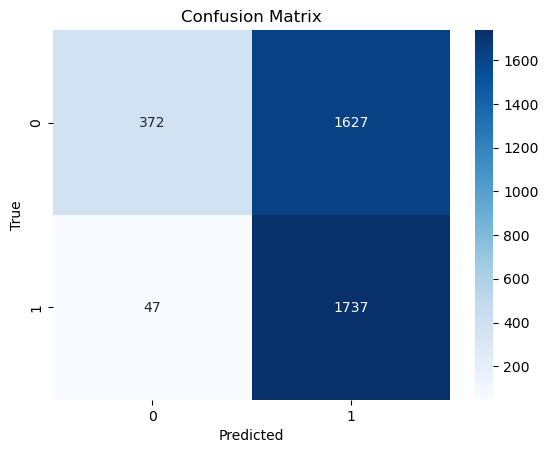

In [27]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, NB_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## SVM Model

In [28]:
from sklearn.svm import SVC

In [29]:
# Hyperparameter grid
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1],
}

# Create an SVM classifier
svm = SVC(probability=True, random_state=42)
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=kf, verbose=10)
svm_grid_search.fit(X_train, y_train)

# Access best model and params
best_svm_model = svm_grid_search.best_estimator_
best_svm_params = svm_grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 1/5; 1/18] END C=0.1, gamma=0.01, kernel=linear;, score=0.835 total time=  12.1s
[CV 2/5; 1/18] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 2/5; 1/18] END C=0.1, gamma=0.01, kernel=linear;, score=0.844 total time=  11.6s
[CV 3/5; 1/18] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 3/5; 1/18] END C=0.1, gamma=0.01, kernel=linear;, score=0.840 total time=  11.5s
[CV 4/5; 1/18] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 4/5; 1/18] END C=0.1, gamma=0.01, kernel=linear;, score=0.842 total time=  11.3s
[CV 5/5; 1/18] START C=0.1, gamma=0.01, kernel=linear...........................
[CV 5/5; 1/18] END C=0.1, gamma=0.01, kernel=linear;, score=0.839 total time=  11.2s
[CV 1/5; 2/18] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 1/5; 2/18] END C=0.1, ga

[CV 1/5; 11/18] END C=1, gamma=1, kernel=linear;, score=0.835 total time= 5.4min
[CV 2/5; 11/18] START C=1, gamma=1, kernel=linear...............................
[CV 2/5; 11/18] END C=1, gamma=1, kernel=linear;, score=0.845 total time=507.4min
[CV 3/5; 11/18] START C=1, gamma=1, kernel=linear...............................
[CV 3/5; 11/18] END C=1, gamma=1, kernel=linear;, score=0.847 total time= 5.4min
[CV 4/5; 11/18] START C=1, gamma=1, kernel=linear...............................
[CV 4/5; 11/18] END C=1, gamma=1, kernel=linear;, score=0.840 total time=15.3min
[CV 5/5; 11/18] START C=1, gamma=1, kernel=linear...............................
[CV 5/5; 11/18] END C=1, gamma=1, kernel=linear;, score=0.840 total time= 5.2min
[CV 1/5; 12/18] START C=1, gamma=1, kernel=rbf..................................
[CV 1/5; 12/18] END ...C=1, gamma=1, kernel=rbf;, score=0.871 total time=  15.4s
[CV 2/5; 12/18] START C=1, gamma=1, kernel=rbf..................................
[CV 2/5; 12/18] END ...C=1,

In [30]:
print(best_svm_params)

svm_y_pred = best_svm_model.predict(X_test)
print("\nClassfication Report for Support Vector Machine Model:")
print(classification_report(y_test, svm_y_pred))

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Classfication Report for Support Vector Machine Model:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1999
           1       0.87      0.90      0.88      1784

    accuracy                           0.89      3783
   macro avg       0.89      0.89      0.89      3783
weighted avg       0.89      0.89      0.89      3783



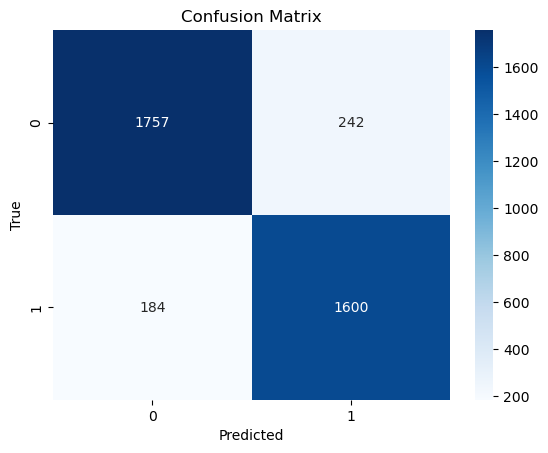

In [31]:
sns.heatmap(confusion_matrix(y_test, svm_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Hyperparameter grid
ds_param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']  # Example values
}


ds = DecisionTreeClassifier(random_state=42)
ds_grid_search = GridSearchCV(ds, ds_param_grid, cv=kf, verbose=10)
ds_grid_search.fit(X_train, y_train)

# Access best model and params
best_ds_model = ds_grid_search.best_estimator_
best_ds_params = ds_grid_search.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START criterion=gini, max_depth=None, max_features=auto, min_samples_split=2
[CV 1/5; 1/108] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 2/5; 1/108] START criterion=gini, max_depth=None, max_features=auto, min_samples_split=2
[CV 2/5; 1/108] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2;, score=0.820 total time=   0.0s
[CV 3/5; 1/108] START criterion=gini, max_depth=None, max_features=auto, min_samples_split=2
[CV 3/5; 1/108] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2;, score=0.822 total time=   0.0s
[CV 4/5; 1/108] START criterion=gini, max_depth=None, max_features=auto, min_samples_split=2
[CV 4/5; 1/108] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 5/5; 1/108] START criterion=gini, max_depth=None, max_features=au

[CV 3/5; 8/108] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=5;, score=0.821 total time=   0.0s
[CV 4/5; 8/108] START criterion=gini, max_depth=None, max_features=log2, min_samples_split=5
[CV 4/5; 8/108] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=5;, score=0.814 total time=   0.0s
[CV 5/5; 8/108] START criterion=gini, max_depth=None, max_features=log2, min_samples_split=5
[CV 5/5; 8/108] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=5;, score=0.823 total time=   0.0s
[CV 1/5; 9/108] START criterion=gini, max_depth=None, max_features=log2, min_samples_split=10
[CV 1/5; 9/108] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=10;, score=0.824 total time=   0.0s
[CV 2/5; 9/108] START criterion=gini, max_depth=None, max_features=log2, min_samples_split=10
[CV 2/5; 9/108] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=10;, score=0.843 total time=   0.0s
[CV 

[CV 1/5; 18/108] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=10;, score=0.862 total time=   0.0s
[CV 2/5; 18/108] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=10
[CV 2/5; 18/108] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=10;, score=0.791 total time=   0.0s
[CV 3/5; 18/108] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=10
[CV 3/5; 18/108] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=10;, score=0.870 total time=   0.0s
[CV 4/5; 18/108] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=10
[CV 4/5; 18/108] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=10;, score=0.847 total time=   0.0s
[CV 5/5; 18/108] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=10
[CV 5/5; 18/108] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=10;, score=0.865 total time=   0.0s
[CV 1/5;

[CV 5/5; 25/108] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=2;, score=0.821 total time=   0.0s
[CV 1/5; 26/108] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5
[CV 1/5; 26/108] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5;, score=0.818 total time=   0.0s
[CV 2/5; 26/108] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5
[CV 2/5; 26/108] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5;, score=0.844 total time=   0.0s
[CV 3/5; 26/108] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5
[CV 3/5; 26/108] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5;, score=0.830 total time=   0.0s
[CV 4/5; 26/108] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5
[CV 4/5; 26/108] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5;, score=0.835 total time=   0.0s
[CV 5/5; 26/108] 

[CV 5/5; 33/108] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=10;, score=0.836 total time=   0.0s
[CV 1/5; 34/108] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=2
[CV 1/5; 34/108] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 2/5; 34/108] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=2
[CV 2/5; 34/108] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=2;, score=0.817 total time=   0.0s
[CV 3/5; 34/108] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=2
[CV 3/5; 34/108] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=2;, score=0.817 total time=   0.0s
[CV 4/5; 34/108] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=2
[CV 4/5; 34/108] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 5/5; 34/108]

[CV 3/5; 44/108] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5;, score=0.818 total time=   0.0s
[CV 4/5; 44/108] START criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5
[CV 4/5; 44/108] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5;, score=0.821 total time=   0.0s
[CV 5/5; 44/108] START criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5
[CV 5/5; 44/108] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5;, score=0.816 total time=   0.0s
[CV 1/5; 45/108] START criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10
[CV 1/5; 45/108] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10;, score=0.835 total time=   0.0s
[CV 2/5; 45/108] START criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10
[CV 2/5; 45/108] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10;,

[CV 3/5; 53/108] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5;, score=0.848 total time=   0.0s
[CV 4/5; 53/108] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5
[CV 4/5; 53/108] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5;, score=0.838 total time=   0.0s
[CV 5/5; 53/108] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5
[CV 5/5; 53/108] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5;, score=0.780 total time=   0.0s
[CV 1/5; 54/108] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10
[CV 1/5; 54/108] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10;, score=0.861 total time=   0.0s
[CV 2/5; 54/108] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10
[CV 2/5; 54/108] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10;, score=0.877 total

[CV 5/5; 63/108] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=10;, score=0.836 total time=   0.0s
[CV 1/5; 64/108] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=2
[CV 1/5; 64/108] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=2;, score=0.811 total time=   0.0s
[CV 2/5; 64/108] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=2
[CV 2/5; 64/108] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=2;, score=0.819 total time=   0.0s
[CV 3/5; 64/108] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=2
[CV 3/5; 64/108] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 4/5; 64/108] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=2
[CV 4/5; 64/108] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=2;, score=0.798 total ti

[CV 1/5; 74/108] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5;, score=0.811 total time=   0.0s
[CV 2/5; 74/108] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5
[CV 2/5; 74/108] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5;, score=0.834 total time=   0.0s
[CV 3/5; 74/108] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5
[CV 3/5; 74/108] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5;, score=0.818 total time=   0.0s
[CV 4/5; 74/108] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5
[CV 4/5; 74/108] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5;, score=0.821 total time=   0.0s
[CV 5/5; 74/108] START criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5
[CV 5/5; 74/108] END criterion=log_loss, max_depth=None, max_features=auto, min_samples_spli

[CV 1/5; 86/108] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5;, score=0.854 total time=   0.0s
[CV 2/5; 86/108] START criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5
[CV 2/5; 86/108] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5;, score=0.886 total time=   0.0s
[CV 3/5; 86/108] START criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5
[CV 3/5; 86/108] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5;, score=0.848 total time=   0.0s
[CV 4/5; 86/108] START criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5
[CV 4/5; 86/108] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5;, score=0.838 total time=   0.0s
[CV 5/5; 86/108] START criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5
[CV 5/5; 86/108] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5;, score=0.780 

[CV 2/5; 94/108] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=2;, score=0.837 total time=   0.0s
[CV 3/5; 94/108] START criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=2
[CV 3/5; 94/108] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=2;, score=0.832 total time=   0.0s
[CV 4/5; 94/108] START criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=2
[CV 4/5; 94/108] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=2;, score=0.832 total time=   0.0s
[CV 5/5; 94/108] START criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=2
[CV 5/5; 94/108] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=2;, score=0.833 total time=   0.0s
[CV 1/5; 95/108] START criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=5
[CV 1/5; 95/108] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_split=5;, score=0.831 

[CV 5/5; 104/108] END criterion=log_loss, max_depth=30, max_features=sqrt, min_samples_split=5;, score=0.816 total time=   0.0s
[CV 1/5; 105/108] START criterion=log_loss, max_depth=30, max_features=sqrt, min_samples_split=10
[CV 1/5; 105/108] END criterion=log_loss, max_depth=30, max_features=sqrt, min_samples_split=10;, score=0.833 total time=   0.0s
[CV 2/5; 105/108] START criterion=log_loss, max_depth=30, max_features=sqrt, min_samples_split=10
[CV 2/5; 105/108] END criterion=log_loss, max_depth=30, max_features=sqrt, min_samples_split=10;, score=0.851 total time=   0.0s
[CV 3/5; 105/108] START criterion=log_loss, max_depth=30, max_features=sqrt, min_samples_split=10
[CV 3/5; 105/108] END criterion=log_loss, max_depth=30, max_features=sqrt, min_samples_split=10;, score=0.843 total time=   0.0s
[CV 4/5; 105/108] START criterion=log_loss, max_depth=30, max_features=sqrt, min_samples_split=10
[CV 4/5; 105/108] END criterion=log_loss, max_depth=30, max_features=sqrt, min_samples_split=

In [34]:
print(best_ds_params)

ds_y_pred = best_ds_model.predict(X_test)
print(classification_report(y_test, ds_y_pred))

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1999
           1       0.86      0.89      0.87      1784

    accuracy                           0.88      3783
   macro avg       0.88      0.88      0.88      3783
weighted avg       0.88      0.88      0.88      3783



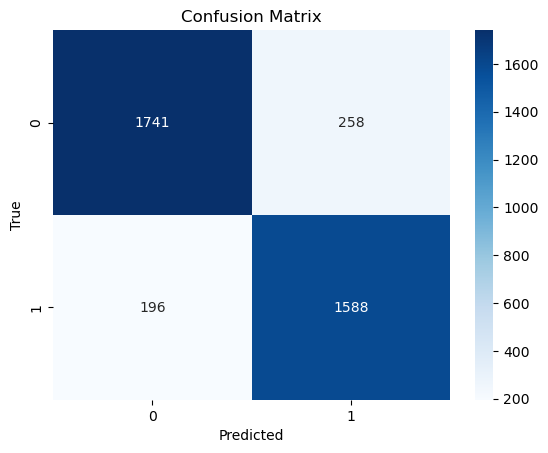

In [35]:
sns.heatmap(confusion_matrix(y_test, ds_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# MODEL EVALUATION

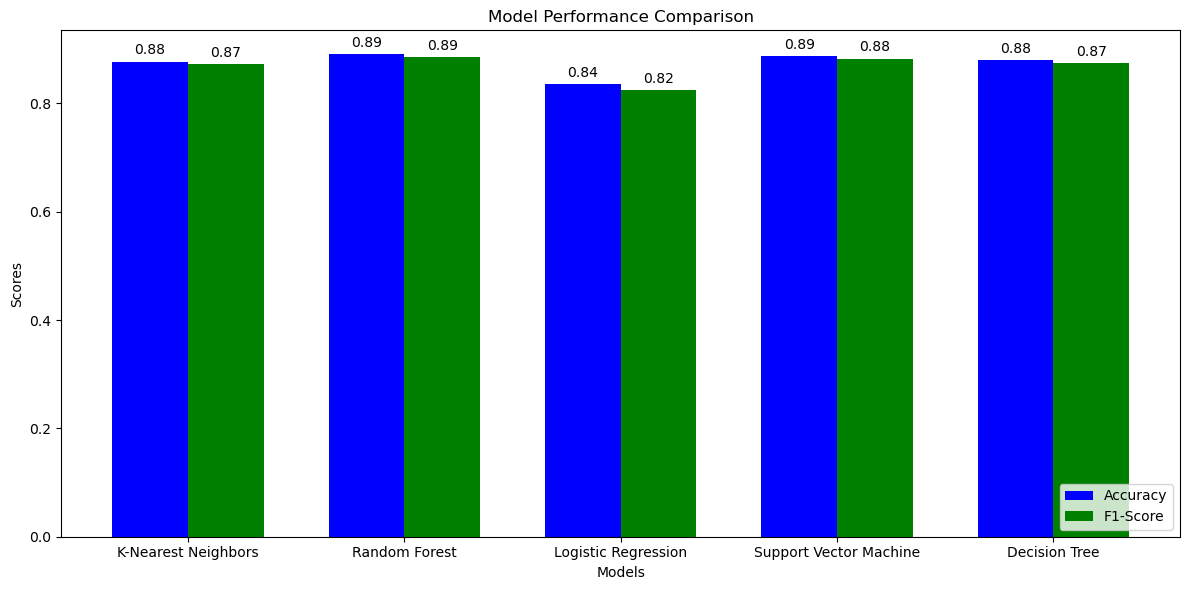

In [50]:
model_names = ["K-Nearest Neighbors", "Random Forest", "Logistic Regression", "Support Vector Machine", "Decision Tree"]
accuracies = [accuracy_score(y_test, knn_y_pred), accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, lr_y_pred), accuracy_score(y_test, svm_y_pred), accuracy_score(y_test, ds_y_pred)]
f1_scores = [f1_score(y_test, knn_y_pred), f1_score(y_test, rf_y_pred), f1_score(y_test, lr_y_pred), f1_score(y_test, svm_y_pred), f1_score(y_test, ds_y_pred)]

#Create an array for the x-axis positions of bars
x = np.arange(len(model_names))

#Set the width of the bars
bar_width = 0.35

#Create subplots (two bar charts side by side)
fig, ax = plt.subplots(figsize=(12, 6))

#Create the bar chart for accuracy
bar1 = ax.bar(x - bar_width/2, accuracies, bar_width, label='Accuracy', color='b')

#Create the bar chart for F1-score
bar2 = ax.bar(x + bar_width/2, f1_scores, bar_width, label='F1-Score', color='g')

#Set labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend(loc='lower right')

#Add actual value labels on each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', # Format the label as desired
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)  # Add labels for the Accuracy bars
add_labels(bar2)  # Add labels for the F1-Score bars

#Display the bar chart
plt.tight_layout()
plt.show()

## ROC Curve & AUC value

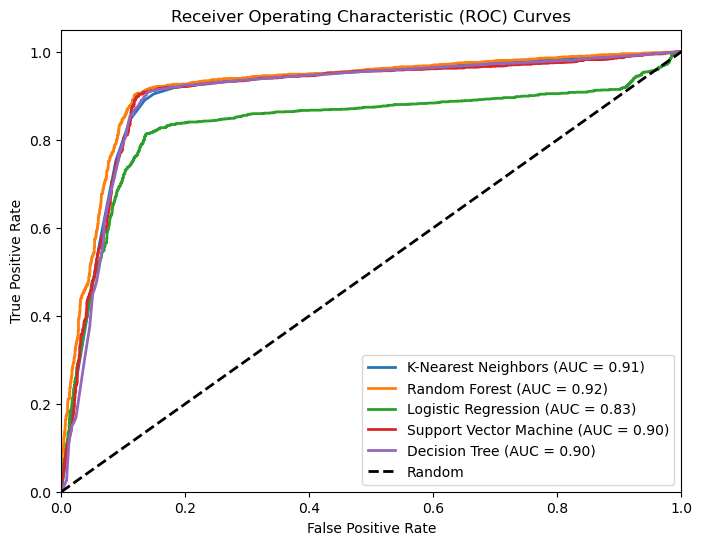

In [43]:
# Define a list of model names and their respective classifiers
model_names = ["K-Nearest Neighbors", "Random Forest", "Logistic Regression", "Support Vector Machine", "Decision Tree"]  # Add your model names here
classifiers = [best_knn_model, best_rf_model, best_lr_model, best_svm_model, best_ds_model]  # Add your classifiers here 

# Create a figure for ROC curves
plt.figure(figsize=(8, 6))

# Plot ROC curves for each model
for model, model_name in zip(classifiers, model_names):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Show the plot
plt.show()